# new One - Dev started 15/02/2023


In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.metrics import rand_score,adjusted_rand_score
from sklearn.cluster import KMeans
import statistics as s
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import statistics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (MinMaxScaler,
FunctionTransformer,
LabelBinarizer,
LabelEncoder,
OneHotEncoder,
OrdinalEncoder,
StandardScaler,
)
from sklearn import preprocessing
import re

In [2]:
###variables
continuous_values = [
    "Age",
    "trestbps",
    "chol",
    "thalach",
    "oldpeak"
]
NA_REPLACE=["?"]

In [3]:
data=pd.read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",sep=",",header=None)

cols=["Age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]

NR_COLS=len(cols)
data.columns=cols
data.head(4)


,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0


In [4]:
# categorical variables are aprehend by difference
categorical_values = data[data.columns.difference(continuous_values)].columns

In [5]:
for col in NA_REPLACE:
    data.replace(col,np.nan,inplace=True)

In [6]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
x_cont=imp_mean.fit_transform(data[continuous_values])
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
x_cat=imp_mean.fit_transform(data[categorical_values])
data[continuous_values]=pd.DataFrame(x_cont,columns=continuous_values)
data[categorical_values]=pd.DataFrame(x_cat,columns=categorical_values)

In [7]:
# convert types
data[continuous_values] = data[continuous_values].astype("float64")
data[categorical_values] = data[categorical_values].astype("float64").astype(str)


In [8]:
silo1=data.iloc[:100,:]
silo2=data.iloc[100:200,:]
silo3=data.iloc[200:300,:]

## Distributed clustering

1. cada um inicializa  
1.1 ou com elementos tirados de uma distribuição com media igual a sua e desvio padrao x  
1.2 ou com proprios centroides  
1.3 ou com ruido nos dados e depois criar centroides  
2. cada um recebe os centroids e adiciona os seus proprios e a sua media (a media insere vies)  
3. repetir envio até:  
    3.1 medida de concordancia que é matrix confusão de todos os pares de pontos e cujo centroide estao associados   
    

In [9]:
# 1. cada um inicializa com os seus dados
def create_initializer(data,cols,clusters):
    """
    initializer is creating a dummy centroid for initializing
    takes the data, uses it to create random noise and then adds it to the real clusters
    """
    #check if has more than 1  column
    res=np.zeros((clusters,len(cols)))
    for idx,c in enumerate(cols):
      NOISE_DEV=data[c].std()/4
      print(data[c].std())
      #S = np.mean(NOISE_DEV)
    #  print(NOISE_DEV,S)
      # create noise
      noise = np.random.uniform(0,1)
    
      #create clusters
      myres=KMeans(n_clusters=clusters, n_init=10,random_state=0).fit(data[c].values.reshape(-1,1))
    #  print(noise)
      # add noise to clusters
      print("clusters",myres.cluster_centers_)
     # print(noise)
      if noise>0.5:
         noised_init = np.subtract(myres.cluster_centers_, NOISE_DEV)
      else:
        noised_init = np.add(myres.cluster_centers_, NOISE_DEV)  
      #  random_choice=data[c].sample(2)
      print("noised_init",noised_init)
     # print(noised_init.shape)
     # print(res.shape)
      #print("noised_init",noised_init[:,1])

      res[:,idx]=noised_init[:,0]
        #res.append(random_choice.values)
      print(res)
    return res
    

    #return np.array(noised_init)
init_l_1=create_initializer(silo1,["Age","trestbps"],2) #1.1
init_l_2=create_initializer(silo2,["Age","trestbps"],2) #1.1
init_l_3=create_initializer(silo3,["Age","trestbps"],2) #1.1
print("init_1",init_l_1)
print("init_2",init_l_2)
print("init_3",init_l_3)


8.12012713240776
clusters [[61.39215686]
 [47.79591837]]
noised_init [[59.36212508]
 [45.76588658]]
[[59.36212508  0.        ]
 [45.76588658  0.        ]]
15.545774702828776
clusters [[147.27272727]
 [122.07142857]]
noised_init [[151.15917095]
 [125.95787225]]
[[ 59.36212508 151.15917095]
 [ 45.76588658 125.95787225]]
9.490510944085043
clusters [[45.57142857]
 [61.01724138]]
noised_init [[47.94405631]
 [63.38986912]]
[[47.94405631  0.        ]
 [63.38986912  0.        ]]
19.483416932189677
clusters [[120.453125  ]
 [151.27777778]]
noised_init [[125.32397923]
 [156.14863201]]
[[ 47.94405631 125.32397923]
 [ 63.38986912 156.14863201]]
9.496469306691266
clusters [[44.35      ]
 [60.71666667]]
noised_init [[41.97588267]
 [58.34254934]]
[[41.97588267  0.        ]
 [58.34254934  0.        ]]
17.86314698484061
clusters [[119.76923077]
 [149.94285714]]
noised_init [[115.30344402]
 [145.4770704 ]]
[[ 41.97588267 115.30344402]
 [ 58.34254934 145.4770704 ]]
init_1 [[ 59.36212508 151.15917095]
 [ 

In [10]:
init_l__1=create_initializer(silo1,["Age","trestbps","chol"],2) #1.1
init_l__2=create_initializer(silo2,["Age","trestbps","chol"],2) #1.1
init_l__3=create_initializer(silo3,["Age","trestbps","chol"],2) #1.1
print("init_1",init_l__1)
print("init_2",init_l__2)
print("init_3",init_l__3)

8.12012713240776
clusters [[61.39215686]
 [47.79591837]]
noised_init [[59.36212508]
 [45.76588658]]
[[59.36212508  0.          0.        ]
 [45.76588658  0.          0.        ]]
15.545774702828776
clusters [[147.27272727]
 [122.07142857]]
noised_init [[151.15917095]
 [125.95787225]]
[[ 59.36212508 151.15917095   0.        ]
 [ 45.76588658 125.95787225   0.        ]]
49.12989996638575
clusters [[300.96969697]
 [219.70149254]]
noised_init [[288.68722198]
 [207.41901755]]
[[ 59.36212508 151.15917095 288.68722198]
 [ 45.76588658 125.95787225 207.41901755]]
9.490510944085043
clusters [[45.57142857]
 [61.01724138]]
noised_init [[47.94405631]
 [63.38986912]]
[[47.94405631  0.          0.        ]
 [63.38986912  0.          0.        ]]
19.483416932189677
clusters [[120.453125  ]
 [151.27777778]]
noised_init [[125.32397923]
 [156.14863201]]
[[ 47.94405631 125.32397923   0.        ]
 [ 63.38986912 156.14863201   0.        ]]
57.01461800860079
clusters [[227.59375   ]
 [313.72222222]]
noised_in

In [11]:
#2. cada um recebe os centroids e adiciona os seus proprios e a sua media (a media insere vies)  
def calculate_centroids(seeds,data,cols,clusters):
    """
    with data, calculates own mean and centroids and add to data:= centroids from the rest 
    """
    print("seeds",seeds)
    results=[]
    for idx,c in enumerate(cols):
        print(c)
       # mean=np.array(data[c].mean())
        real_centroids=KMeans(n_clusters=clusters,n_init=10, random_state=0).fit(data[c].values.reshape(-1,1))
       # other_seeds=np.array(seeds)#.flatten()
        other_seeds=np.array([item[:,idx] for item in seeds])
       # print(other_seeds)
       # other_seeds=np.append(other_seeds,mean)

      #  print(idx)

        final_list_data=np.append(other_seeds,real_centroids.cluster_centers_) #add real centroids

        print("final.list.data",final_list_data)
        res=KMeans(n_clusters=clusters,n_init=10, random_state=0).fit(final_list_data.reshape(-1, 1)) #calculate new centroids
        results.append(res.cluster_centers_.flatten())
    return results


In [12]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(silo1["sex"].values.reshape(-1, 1))
silo1.loc[:,"sex"]=enc.transform(silo1.loc[:,"sex"].values.reshape(-1, 1))
silo2.loc[:,"sex"]=enc.transform(silo2.loc[:,"sex"].values.reshape(-1, 1))
silo3.loc[:,"sex"]=enc.transform(silo3.loc[:,"sex"].values.reshape(-1, 1))

/var/folders/8g/rym67m5d29dcjm2td47sgb_m0000gn/T/ipykernel_61859/2226949085.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  silo1.loc[:,"sex"]=enc.transform(silo1.loc[:,"sex"].values.reshape(-1, 1))
/var/folders/8g/rym67m5d29dcjm2td47sgb_m0000gn/T/ipykernel_61859/2226949085.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  silo1.loc[:,"sex"]=enc.transform(silo1.loc[:,"sex"].values.reshape(-1, 1))
/var/folders/8g/rym67m5d29dcjm2td47sgb_m0000gn/T/ipykernel_61859/2226949085.py:5: SettingWithCopyWarning: 
A value is trying to 

In [13]:
c1=calculate_centroids([init_l__2,init_l__3],silo1,["Age","trestbps","sex"],2)
c2=calculate_centroids([init_l__1,init_l__3],silo2,["Age","trestbps","sex"],2)
c3=calculate_centroids([init_l__1,init_l__2],silo3,["Age","trestbps","sex"],2)
print("c1",c1)
print("c2",c2)
print("c3",c3)

seeds [array([[ 47.94405631, 125.32397923, 241.8474045 ],
       [ 63.38986912, 156.14863201, 327.97587672]]), array([[ 46.72411733, 124.23501752, 197.14448858],
       [ 63.09078399, 154.40864389, 275.97087747]])]
Age
final.list.data [47.94405631 63.38986912 46.72411733 63.09078399 61.39215686 47.79591837]
trestbps
final.list.data [125.32397923 156.14863201 124.23501752 154.40864389 147.27272727
 122.07142857]
sex
final.list.data [ 2.41847405e+02  3.27975877e+02  1.97144489e+02  2.75970877e+02
 -5.55111512e-16  1.00000000e+00]
seeds [array([[ 59.36212508, 151.15917095, 288.68722198],
       [ 45.76588658, 125.95787225, 207.41901755]]), array([[ 46.72411733, 124.23501752, 197.14448858],
       [ 63.09078399, 154.40864389, 275.97087747]])]
Age
final.list.data [59.36212508 45.76588658 46.72411733 63.09078399 45.57142857 61.01724138]
trestbps
final.list.data [151.15917095 125.95787225 124.23501752 154.40864389 120.453125
 151.27777778]
sex
final.list.data [288.68722198 207.41901755 197.14

In [14]:
c1=calculate_centroids([init_l_2,init_l_3],silo1,["Age","trestbps"],2)
c2=calculate_centroids([init_l_1,init_l_3],silo2,["Age","trestbps"],2)
c3=calculate_centroids([init_l_1,init_l_2],silo3,["Age","trestbps"],2)
print("c1",c1)
print("c2",c2)
print("c3",c3)

seeds [array([[ 47.94405631, 125.32397923],
       [ 63.38986912, 156.14863201]]), array([[ 41.97588267, 115.30344402],
       [ 58.34254934, 145.4770704 ]])]
Age
final.list.data [47.94405631 63.38986912 41.97588267 58.34254934 61.39215686 47.79591837]
trestbps
final.list.data [125.32397923 156.14863201 115.30344402 145.4770704  147.27272727
 122.07142857]
seeds [array([[ 59.36212508, 151.15917095],
       [ 45.76588658, 125.95787225]]), array([[ 41.97588267, 115.30344402],
       [ 58.34254934, 145.4770704 ]])]
Age
final.list.data [59.36212508 45.76588658 41.97588267 58.34254934 45.57142857 61.01724138]
trestbps
final.list.data [151.15917095 125.95787225 115.30344402 145.4770704  120.453125
 151.27777778]
seeds [array([[ 59.36212508, 151.15917095],
       [ 45.76588658, 125.95787225]]), array([[ 47.94405631, 125.32397923],
       [ 63.38986912, 156.14863201]])]
Age
final.list.data [59.36212508 45.76588658 47.94405631 63.38986912 44.35       60.71666667]
trestbps
final.list.data [151.1

In [15]:
#3. 
def calculate_centroids_and_score(clusters,other_centroids,mydata,cols,old_preds=None):

    newcs=np.zeros((clusters,len(cols)))
    preds=[]
    scores=[]
    c1=calculate_centroids(other_centroids,mydata,cols,clusters)
    # print(c1)
    print(other_centroids)
    for idx,c in enumerate(c1):
    # print(c)
    # print(idx)
        kmm1_=KMeans(n_clusters=clusters,n_init=10, random_state=0).fit(c.reshape(-1, 1))
        ll=mydata[cols[idx]]
        #  print(ll)
        pred=kmm1_.predict(np.array(ll.values.reshape(-1, 1)))
        # print(pred)
        new_c=kmm1_.cluster_centers_.flatten()
        newcs[:,idx]=new_c
        preds.append(pred)
        if old_preds is not None: #first round
        #  print(old_preds)
            scores.append(rand_score(pred,old_preds[idx]))

    return newcs,preds,scores




In [16]:
xx,_,_=calculate_centroids_and_score(2,[init_l_2,init_l_3],silo1,["Age","trestbps"])
xx

seeds [array([[ 47.94405631, 125.32397923],
       [ 63.38986912, 156.14863201]]), array([[ 41.97588267, 115.30344402],
       [ 58.34254934, 145.4770704 ]])]
Age
final.list.data [47.94405631 63.38986912 41.97588267 58.34254934 61.39215686 47.79591837]
trestbps
final.list.data [125.32397923 156.14863201 115.30344402 145.4770704  147.27272727
 122.07142857]
[array([[ 47.94405631, 125.32397923],
       [ 63.38986912, 156.14863201]]), array([[ 41.97588267, 115.30344402],
       [ 58.34254934, 145.4770704 ]])]


array([[ 61.04152511, 149.63280989],
       [ 45.90528578, 120.89961728]])

In [17]:
#3. repetir envio até:  
#    3.1 medida de concordancia que é matrix confusão de todos os pares de pontos e cujo centroide estao associados   

def mock_data_transfer_and_convergence(limit_after_convergence,threshold,cols_used,clusters=2):
    c1=create_initializer(silo1,cols_used,clusters) 
    c2=create_initializer(silo2,cols_used,clusters)
    c3=create_initializer(silo3,cols_used,clusters)
    print("inits; ",c1,c2,c3)
    old_preds_1=old_preds_2=old_preds_3=None
    last_significance_round=0
    while last_significance_round<limit_after_convergence:
        nc1,old_preds_1,score_1=calculate_centroids_and_score(clusters=clusters,other_centroids=[c2,c3],mydata=silo1,cols=cols_used,old_preds=old_preds_1)
        nc2,old_preds_2,score_2=calculate_centroids_and_score(clusters=clusters,other_centroids=[c1,c3],mydata=silo2,cols=cols_used,old_preds=old_preds_2)
        nc3,old_preds_3,score_3=calculate_centroids_and_score(clusters=clusters,other_centroids=[c1,c2],mydata=silo3,cols=cols_used,old_preds=old_preds_3)
        c1=nc1
        c2=nc2
        c3=nc3
        print("new centroids c1; ",c1,"\nc2:",c2,"\nc3",c3)
        #print("nc1",nc1)
        if len(nc1)!=len(c1):
            raise Exception("wrong number of centroids")
       # print(score_1,score_2,score_3)
       # print(last_significance_round)
        if all([s>threshold for s  in  score_1]) and all([s>threshold for s  in  score_2]) and all([s>threshold for s  in  score_3]):
            last_significance_round+=1
        else:
            last_significance_round=0
    print("aaaa",last_significance_round)

    return nc1,nc2,nc3

In [18]:
f1,f2,f3=mock_data_transfer_and_convergence(20,0.9,["Age","trestbps"])

8.12012713240776
clusters [[61.39215686]
 [47.79591837]]
noised_init [[63.42218865]
 [49.82595015]]
[[63.42218865  0.        ]
 [49.82595015  0.        ]]
15.545774702828776
clusters [[147.27272727]
 [122.07142857]]
noised_init [[151.15917095]
 [125.95787225]]
[[ 63.42218865 151.15917095]
 [ 49.82595015 125.95787225]]
9.490510944085043
clusters [[45.57142857]
 [61.01724138]]
noised_init [[43.19880084]
 [58.64461364]]
[[43.19880084  0.        ]
 [58.64461364  0.        ]]
19.483416932189677
clusters [[120.453125  ]
 [151.27777778]]
noised_init [[125.32397923]
 [156.14863201]]
[[ 43.19880084 125.32397923]
 [ 58.64461364 156.14863201]]
9.496469306691266
clusters [[44.35      ]
 [60.71666667]]
noised_init [[41.97588267]
 [58.34254934]]
[[41.97588267  0.        ]
 [58.34254934  0.        ]]
17.86314698484061
clusters [[119.76923077]
 [149.94285714]]
noised_init [[124.23501752]
 [154.40864389]]
[[ 41.97588267 124.23501752]
 [ 58.34254934 154.40864389]]
inits;  [[ 63.42218865 151.15917095]
 [

In [19]:
kmm2_=KMeans(n_clusters=2, random_state=0).fit(np.array(silo2[["Age","trestbps"]]))
kmm2_.cluster_centers_

/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 52.09230769, 120.76923077],
       [ 59.05714286, 151.57142857]])

In [20]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

In [21]:
silo2[["Age","trestbps"]].mean()

Age          54.53
trestbps    131.55
dtype: float64

In [22]:
f3

array([[ 45.5167157 , 120.5163429 ],
       [ 60.96056186, 149.60964395]])

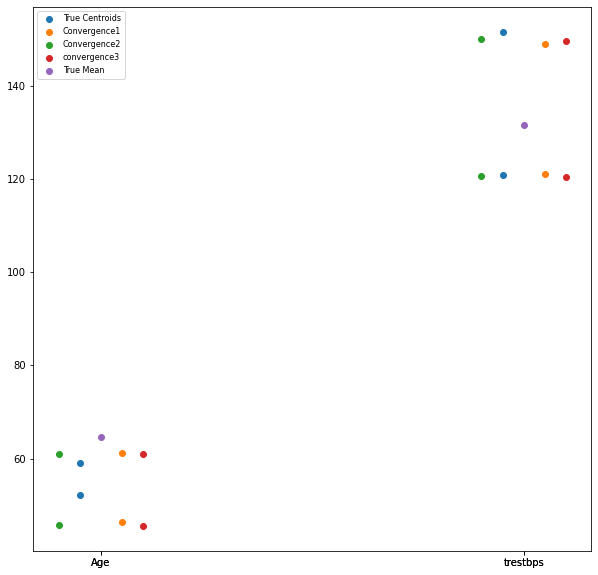

In [23]:
# plot
xlabel=["Age","trestbps","Age","trestbps"]
x=[1,2,1,2]
c1=plt.scatter([x-0.05 for x in x],kmm2_.cluster_centers_)
c2=plt.scatter([x+0.05 for x in x],f1)
c3=plt.scatter([x-0.1 for x in x],f2)
c4=plt.scatter([x+0.1 for x in x],f3)
c5=plt.scatter([1,2],[64.53,131.55])


plt.legend((c1, c2,c3,c4,c5),
           ('True Centroids', 'Convergence1',"Convergence2","convergence3","True Mean"),
           scatterpoints=1,
           loc=2,
           fontsize=8)
plt.xticks(x, xlabel)

plt.savefig("../../Vizs/my_cluster.png")

In [58]:
f1,f2,f3=mock_data_transfer_and_convergence(20,0.9,["Age","trestbps","chol"])

8.12012713240776
clusters [[61.39215686]
 [47.79591837]]
noised_init [[59.36212508]
 [45.76588658]]
[[59.36212508  0.          0.        ]
 [45.76588658  0.          0.        ]]
15.545774702828776
clusters [[147.27272727]
 [122.07142857]]
noised_init [[151.15917095]
 [125.95787225]]
[[ 59.36212508 151.15917095   0.        ]
 [ 45.76588658 125.95787225   0.        ]]
49.12989996638575
clusters [[300.96969697]
 [219.70149254]]
noised_init [[288.68722198]
 [207.41901755]]
[[ 59.36212508 151.15917095 288.68722198]
 [ 45.76588658 125.95787225 207.41901755]]
9.490510944085043
clusters [[45.57142857]
 [61.01724138]]
noised_init [[43.19880084]
 [58.64461364]]
[[43.19880084  0.          0.        ]
 [58.64461364  0.          0.        ]]
19.483416932189677
clusters [[120.453125  ]
 [151.27777778]]
noised_init [[115.58227077]
 [146.40692354]]
[[ 43.19880084 115.58227077   0.        ]
 [ 58.64461364 146.40692354   0.        ]]
57.01461800860079
clusters [[227.59375   ]
 [313.72222222]]
noised_in

In [59]:
kmm3_=KMeans(n_clusters=2, random_state=0).fit(np.array(silo2[["Age","trestbps","chol"]]))
kmm3_.cluster_centers_

/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 52.40322581, 126.53225806, 226.24193548],
       [ 58.        , 139.73684211, 311.39473684]])

In [60]:
plt.rcParams["figure.figsize"] = (7,6)

In [61]:
# true centroids

m1=silo2[["Age"]].mean()
m11=silo1[["Age"]].mean()
m13=silo3[["Age"]].mean()

m2=silo2[["trestbps"]].mean()
m21=silo1[["trestbps"]].mean()
m23=silo3[["trestbps"]].mean()

m3=silo2[["chol"]].mean()
m31=silo1[["chol"]].mean()
m33=silo3[["chol"]].mean()

kmtc=KMeans(n_clusters=2, random_state=0).fit(np.concatenate((m1.values,m11.values,m13.values)).reshape(-1, 1))
kmtc.cluster_centers_


kmtc1=KMeans(n_clusters=2, random_state=0).fit(np.concatenate((m2.values,m21.values,m23.values)).reshape(-1, 1))
kmtc1.cluster_centers_

kmtc2=KMeans(n_clusters=2, random_state=0).fit(np.concatenate((m3.values,m31.values,m33.values)).reshape(-1, 1))
kmtc2.cluster_centers_

/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[258.6 ],
       [241.73]])

In [62]:
kmtc=KMeans(n_clusters=2, random_state=0).fit(data["Age"].values.reshape(-1, 1))
kmtc.cluster_centers_


kmtc1=KMeans(n_clusters=2, random_state=0).fit(data["trestbps"].values.reshape(-1, 1))
kmtc1.cluster_centers_

kmtc2=KMeans(n_clusters=2, random_state=0).fit(data["chol"].values.reshape(-1, 1))
kmtc2.cluster_centers_

/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[215.80952381],
       [297.89473684]])

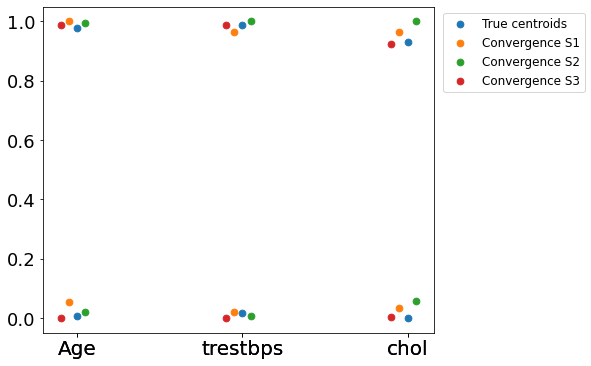

In [63]:
# plot

# plot
xlabel=["Age","trestbps","chol","Age","trestbps","chol"]
x=[1,2,3,1,2,3]
scaler1=MinMaxScaler()
scaler2=MinMaxScaler()
scaler3=MinMaxScaler()

#concatenate the same for applying the scaler
s1=np.concatenate((f1[:,0],f2[:,0],f3[:,0],kmtc.cluster_centers_[:,0]),axis=0)
s2=np.concatenate((f1[:,1],f2[:,1],f3[:,1],kmtc1.cluster_centers_[:,0]),axis=0)
s3=np.concatenate((f1[:,2],f2[:,2],f3[:,2],kmtc2.cluster_centers_[:,0]),axis=0)

#fit transforms
f1_scaled=scaler1.fit_transform(s1.reshape(-1, 1))
f2_scaled=scaler2.fit_transform(s2.reshape(-1, 1))
f3_scaled=scaler3.fit_transform(s3.reshape(-1, 1))

#regrouping
f1_=np.zeros((2,3))
f1_[:,0]=f1_scaled[0:2,0]
f1_[:,1]=f2_scaled[0:2,0]
f1_[:,2]=f3_scaled[0:2,0]

f2_=np.zeros((2,3))
f2_[:,0]=f1_scaled[2:4,0]
f2_[:,1]=f2_scaled[2:4,0]
f2_[:,2]=f3_scaled[2:4,0]

f3_=np.zeros((2,3))
f3_[:,0]=f1_scaled[4:6,0]
f3_[:,1]=f2_scaled[4:6,0]
f3_[:,2]=f3_scaled[4:6,0]

SIZE=45

#true centroids
centroid1=f1_scaled[6:8,0] #scaler1.transform(kmtc.cluster_centers_.reshape(-1, 1))
centroid2=f2_scaled[6:8,0]#scaler2.transform(kmtc1.cluster_centers_.reshape(-1, 1))
centroid3=f3_scaled[6:8,0]#scaler3.transform(kmtc2.cluster_centers_.reshape(-1, 1))

c1=plt.scatter(x,np.array([centroid1,centroid2,centroid3]).T,s=SIZE)
c2=plt.scatter([x-0.05 for x in x],f1_,s=SIZE)
c3=plt.scatter([x+0.05 for x in x],f2_,s=SIZE)
c4=plt.scatter([x-0.10 for x in x],f3_,s=SIZE)

plt.legend((c1, c2,c3,c4),
           ('True centroids', 'Convergence S1',"Convergence S2","Convergence S3"),
           scatterpoints=1,
          # loc=2,
           fontsize=12,bbox_to_anchor=(1.01, 1.))
plt.xticks(x, xlabel)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)

plt.savefig("../../Vizs/my_cluster_3.png",bbox_inches='tight')
#jitter - ver chatgpt

NameError: name 's1' is not defined

In [64]:
###variables
continuous_values = [
    "Age",
    "trestbps",
    "chol",
    "thalach",
    "oldpeak"
]
NA_REPLACE=["?"]

In [65]:
data=pd.read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",sep=",",header=None)

cols=["Age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]

NR_COLS=len(cols)
data.columns=cols
data.head(4)


,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0


In [66]:
mydata=np.concatenate((kmm3_.cluster_centers_,f1,f2,f3,silo2[["Age","trestbps","chol"]].mean().values.reshape(1,3)))

In [67]:
xx=pd.DataFrame(mydata)

In [68]:
xx.columns=["Age","trestbps","chol"]

In [69]:
xx.index=["True centroid 1","True centroid 2","Silo 1 Convergence","Silo 1 Convergence 2","Silo 2 Convergence 1","Silo 2 Convergence 2","Silo 3 Convergence","Silo 3 Convergence 2","True mean"]

In [70]:
xx

,Age,trestbps,chol
True centroid 1,52.403226,126.532258,226.241935
True centroid 2,58.000000,139.736842,311.394737
Silo 1 Convergence,61.129254,148.941677,300.762205
Silo 1 Convergence 2,46.378014,121.091458,218.889388
Silo 2 Convergence 1,45.821892,120.686882,220.862452
Silo 2 Convergence 2,61.035525,149.942940,303.950337
Silo 3 Convergence,45.516535,120.515909,216.104640
Silo 3 Convergence 2,60.960381,149.609210,297.367003
True mean,54.530000,131.550000,258.600000


In [71]:

s = xx.style

s.format({
   "Age": '{:.2f}',
      "trestbps": '{:.2f}',
   "chol": '{:.2f}'})

tex=s.to_latex(hrules=True,column_format="l|ccc",multirow_align="t",convert_css=True,position_float="centering",position="htbp",caption="Final Data points after convergence, using silo 2 as example",label="tab:datapoints")



In [72]:
f = open("../../Vizs/Continuous_categorical.tex", "w")

f.write(tex)
f.close()

## My data

In [73]:
mydata=pd.read_csv("/Users/joaoalmeida/Desktop/tese_local/Obscare Giovana/imputed/minimumprocesssing_cluster.csv")

/var/folders/8g/rym67m5d29dcjm2td47sgb_m0000gn/T/ipykernel_61859/51126511.py:1: DtypeWarning: Columns (14,40,79) have mixed types. Specify dtype option on import or set low_memory=False.
  mydata=pd.read_csv("/Users/joaoalmeida/Desktop/tese_local/Obscare Giovana/imputed/minimumprocesssing_cluster.csv")


In [74]:
int_cols = ["A_PARA","A_GESTA","EUTOCITO_ANTERIOR","VENTOSAS_ANTERIOR","FORCEPS_ANTERIOR","CESARIANAS_ANTERIOR",
    "IDADE_MATERNA",
    "PESO_INICIAL",
    "IMC",
    "NUMERO_CONSULTAS_PRE_NATAL",
    "IDADE_GESTACIONAL_ADMISSAO",
    "SEMANAS_GESTACAO_PARTO",
    "PESO_ADMISSAO_INTERNAMENTO",
    "ESTIMATIVA_PESO_ECO_30",
    "ESTIMATIVA_PESO_ECO_31",
    "ESTIMATIVA_PESO_ECO_32",
    "ESTIMATIVA_PESO_ECO_24",
"ESTIMATIVA_PESO_ECO_25",
"ESTIMATIVA_PESO_ECO_26",
"ESTIMATIVA_PESO_ECO_27",
"ESTIMATIVA_PESO_ECO_28",
"ESTIMATIVA_PESO_ECO_29",
"ESTIMATIVA_PESO_ECO_33",
"ESTIMATIVA_PESO_ECO_34",
"ESTIMATIVA_PESO_ECO_35",
"ESTIMATIVA_PESO_ECO_36",
"ESTIMATIVA_PESO_ECO_37",
"ESTIMATIVA_PESO_ECO_38",
"ESTIMATIVA_PESO_ECO_39",
"ESTIMATIVA_PESO_ECO_40",
"ESTIMATIVA_PESO_ECO_41"]


In [75]:
cat_cols = list(set(mydata.columns)  - set(int_cols))

In [76]:
cat_cols

['APRESENTACAO_29',
 'DIABETES_GESTACIONAL_INSULINA',
 'GS_ABO',
 'DIABETES_GESTACIONAL_ANTIBIO',
 'APRESENTACAO_30',
 'RPM',
 'APRESENTACAO_37',
 'BISHOP_DILATACAO',
 'CIGARROS',
 'APRESENTACAO_36',
 'VIGIADA',
 'APRESENTACAO_39',
 'TIPO_PARTO_REDUCE',
 'APRESENTACAO_28',
 'DIABETES_GESTACIONAL_DIETA',
 'VIGIADA_HOSPITAL',
 'BISHOP_EXTINCAO',
 'TIPO_PARTO',
 'BACIA',
 'RESPIRATORIA',
 'APRESENTACAO_32',
 'silo',
 'CEREBRAL',
 'GS_RH',
 'DATA_PARTO',
 'ESTUPEFACIENTES',
 'APRESENTACAO_41',
 'APRESENTACAO_35',
 'HIPERTENSAO_PRE_ECLAMPSIA',
 'BISHOP_CONSISTENCIA',
 'VIGIADA_NESTE_HOSPITAL',
 'GRUPO_ROBSON',
 'CARDIACA',
 'BISHOP_SCORE',
 'DIABETES_GESTACIONAL',
 'APRESENTACAO_NO_PARTO',
 'BISHOP_DESCIDA',
 'APRESENTACAO_38',
 'APRESENTACAO_40',
 'TRAB_PARTO_ENTRADA_ESPONTANEO',
 'APRESENTACAO_24',
 'APRESENTACAO_25',
 'DIABETES_MATERNA',
 'APRESENTACAO_ADMISSAO',
 'HEMATOLOGICA',
 'APRESENTACAO_26',
 'VIGIADA_PARICULAR',
 'APRESENTACAO_31',
 'HIPERTENSAO_GESTACIONAL',
 'CESARIANAS_MOTIVO

In [77]:
int_imputer = Pipeline(
       steps=[("imputer", SimpleImputer(strategy="mean"))]
)



categorical_imputer_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="constant", fill_value="missing")),("encoder", OneHotEncoder(handle_unknown="error",sparse=False,drop="if_binary"))]
    )


pipeline = Pipeline(steps=[("preprocessor", ColumnTransformer(
    transformers=[
        ("cat", categorical_imputer_transformer, cat_cols),
        ("num", int_imputer, int_cols)
    ]
))])

In [78]:
mydata[cat_cols]=mydata[cat_cols].astype("str")

In [79]:
mydata_enconded = pipeline.fit_transform(mydata)
df_treated=pd.DataFrame(mydata_enconded,columns=pipeline.get_feature_names_out())
df_treated.columns=[re.sub('\w+__', '',c) for c in df_treated.columns]

/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [80]:
df_treated

,APRESENTACAO_29_cefálica,APRESENTACAO_29_cefálica dorso anterior,APRESENTACAO_29_cefálica dorso posterior,APRESENTACAO_29_cefálica dorso à direita,APRESENTACAO_29_cefálica dorso à esquerda,APRESENTACAO_29_cefálica insinuada,APRESENTACAO_29_cefálica muito insinuada,APRESENTACAO_29_cefálica muito-inusitada,"APRESENTACAO_29_cefálica, dorso anterior",APRESENTACAO_29_cefálico dorso à esquerda,...,ESTIMATIVA_PESO_ECO_29,ESTIMATIVA_PESO_ECO_33,ESTIMATIVA_PESO_ECO_34,ESTIMATIVA_PESO_ECO_35,ESTIMATIVA_PESO_ECO_36,ESTIMATIVA_PESO_ECO_37,ESTIMATIVA_PESO_ECO_38,ESTIMATIVA_PESO_ECO_39,ESTIMATIVA_PESO_ECO_40,ESTIMATIVA_PESO_ECO_41
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1422.003984,2150.929834,2357.821124,2582.631569,1859.000000,2930.361462,3071.882695,3236.468085,3513.846154,3839.8
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1422.003984,2150.929834,2357.821124,2123.000000,2786.288534,2937.000000,3071.882695,3236.468085,3513.846154,3839.8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1422.003984,2150.929834,2357.821124,2582.631569,2786.288534,2930.361462,3071.882695,3236.468085,3513.846154,3839.8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1422.003984,2150.929834,2357.821124,2582.631569,2786.288534,2930.361462,3071.882695,3236.468085,3513.846154,3839.8
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1422.003984,2150.929834,2357.821124,2798.000000,2786.288534,2930.361462,3071.882695,3236.468085,3513.846154,3839.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1422.003984,2150.929834,2357.821124,2819.000000,2786.288534,3163.000000,3071.882695,3236.468085,3513.846154,3839.8
73347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1422.003984,2150.929834,2357.821124,2582.631569,2786.288534,2930.361462,3071.882695,3236.468085,3513.846154,3839.8
73348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1422.003984,2150.929834,2357.821124,2582.631569,3106.000000,2930.361462,3071.882695,3236.468085,3513.846154,3839.8
73349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1422.003984,2064.000000,2357.821124,2582.631569,2786.288534,2930.361462,3071.882695,3236.468085,3513.846154,3839.8


In [81]:
CHSJ=df_treated[mydata["silo"]=="CHSJ"]
HSO=df_treated[mydata["silo"]=="HSO"]
CHTS=df_treated[mydata["silo"]=="CHTS"]
ULSAM=df_treated[mydata["silo"]=="ULSAM"]
CHEDV=df_treated[mydata["silo"]=="CHEDV"]
CHVNG=df_treated[mydata["silo"]=="CHVNGE"]
ULSM=df_treated[mydata["silo"]=="ULSM"]
CHBV=df_treated[mydata["silo"]=="CHBV"]
CHLN=df_treated[mydata["silo"]=="CHLN"]


In [82]:
#3. repetir envio até:  
#    3.1 medida de concordancia que é matrix confusão de todos os pares de pontos e cujo centroide estao associados   

def mock_data_transfer_and_convergence_9silos(limit_after_convergence,threshold,cols_used,clusters=2):
    c1=create_initializer(CHSJ,cols_used,clusters) 
    c2=create_initializer(HSO,cols_used,clusters)
    c3=create_initializer(CHTS,cols_used,clusters)
    c4=create_initializer(ULSAM,cols_used,clusters)
    c5=create_initializer(CHEDV,cols_used,clusters)
    c6=create_initializer(CHVNG,cols_used,clusters)
    c7=create_initializer(ULSM,cols_used,clusters)
    c8=create_initializer(CHBV,cols_used,clusters)
    c9=create_initializer(CHLN,cols_used,clusters)

    print("inits; ",c1,c2,c3)
    old_preds_1=old_preds_2=old_preds_3=old_preds_4=old_preds_5=old_preds_6=old_preds_7=old_preds_8=old_preds_9=None
    convergence=False
    last_significance_round=0
    while not convergence and last_significance_round<limit_after_convergence:
        nc1,old_preds_1,score_1=calculate_centroids_and_score(clusters=clusters,other_centroids=[c2,c3,c4,c5,c6,c7,c8,c9],mydata=CHSJ,cols=cols_used,old_preds=old_preds_1)
        nc2,old_preds_2,score_2=calculate_centroids_and_score(clusters=clusters,other_centroids=[c1,c3,c4,c5,c6,c7,c8,c9],mydata=HSO,cols=cols_used,old_preds=old_preds_2)
        nc3,old_preds_3,score_3=calculate_centroids_and_score(clusters=clusters,other_centroids=[c1,c2,c4,c5,c6,c7,c8,c9],mydata=CHTS,cols=cols_used,old_preds=old_preds_3)
        nc4,old_preds_4,score_4=calculate_centroids_and_score(clusters=clusters,other_centroids=[c1,c2,c3,c5,c6,c7,c8,c9],mydata=ULSAM,cols=cols_used,old_preds=old_preds_4)
        nc5,old_preds_5,score_5=calculate_centroids_and_score(clusters=clusters,other_centroids=[c1,c2,c3,c4,c6,c7,c8,c9],mydata=CHEDV,cols=cols_used,old_preds=old_preds_5)
        nc6,old_preds_6,score_6=calculate_centroids_and_score(clusters=clusters,other_centroids=[c1,c2,c3,c4,c5,c7,c8,c9],mydata=CHVNG,cols=cols_used,old_preds=old_preds_6)
        nc7,old_preds_7,score_7=calculate_centroids_and_score(clusters=clusters,other_centroids=[c1,c2,c3,c4,c5,c6,c8,c9],mydata=ULSM,cols=cols_used,old_preds=old_preds_7)
        nc8,old_preds_8,score_8=calculate_centroids_and_score(clusters=clusters,other_centroids=[c1,c2,c3,c4,c5,c6,c7,c9],mydata=CHBV,cols=cols_used,old_preds=old_preds_8)
        nc9,old_preds_9,score_9=calculate_centroids_and_score(clusters=clusters,other_centroids=[c1,c2,c3,c4,c5,c6,c7,c8],mydata=CHLN,cols=cols_used,old_preds=old_preds_9)

        c1=nc1
        c2=nc2
        c3=nc3
        c4=nc4
        c5=nc5
        c6=nc6
        c7=nc7
        c8=nc8
        c9=nc9

        print("new centroids c1; ",c1,"\nc2:",c2,"\nc3",c3)
       # print(score_1,score_2,score_3)
       # print(last_significance_round)
       # if score_1>threshold and score_2>threshold and score_3>threshold:
        if all([s>threshold for s  in  score_1]) and all([s>threshold for s  in  score_2]) and all([s>threshold for s  in  score_3]) and all([s>threshold for s  in  score_4]) and all([s>threshold for s  in  score_5]) and all([s>threshold for s  in  score_6]) and all([s>threshold for s  in  score_7]) and all([s>threshold for s  in  score_8]) and all([s>threshold for s  in  score_9]):
            convergence=True
            last_significance_round+=1
        else:
            convergence=False
            last_significance_round=0
    return nc1,nc2,nc3,nc4,nc5,nc6,nc7,nc8,nc9

In [83]:
xx=mock_data_transfer_and_convergence_9silos(20,1,["IMC","PESO_INICIAL","CIGARROS_nan"])

7.772277652305414
clusters [[ 24.81949428]
 [391.025     ]]
noised_init [[ 26.76256369]
 [392.96806941]]
[[ 26.76256369   0.           0.        ]
 [392.96806941   0.           0.        ]]
13.68719356237246
clusters [[59.63124622]
 [85.12450461]]
noised_init [[56.20944782]
 [81.70270621]]
[[ 26.76256369  56.20944782   0.        ]
 [392.96806941  81.70270621   0.        ]]
0.33085221533251596
clusters [[1.00000000e+00]
 [2.44249065e-15]]
noised_init [[1.08271305]
 [0.08271305]]
[[2.67625637e+01 5.62094478e+01 1.08271305e+00]
 [3.92968069e+02 8.17027062e+01 8.27130538e-02]]
3.727563930677373
clusters [[23.9224231 ]
 [32.78854167]]
noised_init [[24.85431408]
 [33.72043265]]
[[24.85431408  0.          0.        ]
 [33.72043265  0.          0.        ]]
10.119509520640772
clusters [[62.77413213]
 [86.37161145]]
noised_init [[60.24425475]
 [83.84173407]]
[[24.85431408 60.24425475  0.        ]
 [33.72043265 83.84173407  0.        ]]
0.284214480454081
clusters [[ 1.00000000e+00]
 [-1.88737914

In [84]:
plt.rcParams["figure.figsize"] = (7,6)

In [85]:
# true centroids
overall_silos=[CHSJ,HSO,CHTS,ULSAM,CHEDV,CHVNG,ULSM,CHBV,CHLN]
results={}
cols=["IMC","PESO_INICIAL","TIPO_PARTO_Cesariana"]
for c in cols:
    m=[]
    for silo in overall_silos:
        m.append(silo[c].mean())
    results[c]=KMeans(n_clusters=2, random_state=0).fit(np.array(m).reshape(-1, 1)) 





/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [86]:
# true centroids
results={}
cols=["IMC","PESO_INICIAL","TIPO_PARTO_Cesariana"]
for c in cols:

    results[c]=KMeans(n_clusters=2, random_state=0).fit(np.array(df_treated[c]).reshape(-1, 1)) 





/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


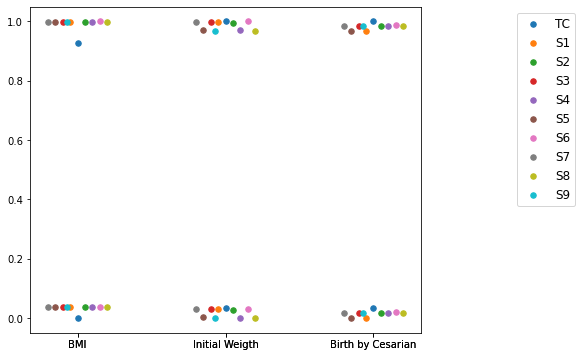

In [87]:
# plot

scaler1=MinMaxScaler()
scaler2=MinMaxScaler()
scaler3=MinMaxScaler()


# plot
xcol=["IMC","PESO_INICIAL","TIPO_PARTO_Cesariana"]
xleg=["BMI","Initial Weigth","Birth by Cesarian","BMI","Initial Weigth","Birth by Cesarian"]
xyx=xleg+xleg

x=[1,2,3,1,2,3]

SIZE=30

s1=np.concatenate((xx[0][:,0],xx[1][:,0],xx[2][:,0],xx[3][:,0],xx[4][:,0],xx[5][:,0],xx[6][:,0],xx[7][:,0],xx[8][:,0],results["IMC"].cluster_centers_[:,0]),axis=0)
s2=np.concatenate((xx[0][:,1],xx[1][:,1],xx[2][:,1],xx[3][:,1],xx[4][:,1],xx[5][:,1],xx[6][:,1],xx[7][:,1],xx[8][:,1],results["PESO_INICIAL"].cluster_centers_[:,0]),axis=0)
s3=np.concatenate((xx[0][:,2],xx[1][:,2],xx[2][:,2],xx[3][:,2],xx[4][:,2],xx[5][:,2],xx[6][:,2],xx[3][:,2],xx[8][:,2],results["TIPO_PARTO_Cesariana"].cluster_centers_[:,0]),axis=0)

#fit transforms
f1_scaled=scaler1.fit_transform(s1.reshape(-1, 1))
f2_scaled=scaler2.fit_transform(s2.reshape(-1, 1))
f3_scaled=scaler3.fit_transform(s3.reshape(-1, 1))

f1_=np.zeros((2,3))
f1_[:,0]=f1_scaled[0:2,0]
f1_[:,1]=f2_scaled[0:2,0]
f1_[:,2]=f3_scaled[0:2,0]

f2_=np.zeros((2,3))
f2_[:,0]=f1_scaled[2:4,0]
f2_[:,1]=f2_scaled[2:4,0]
f2_[:,2]=f3_scaled[2:4,0]

f3_=np.zeros((2,3))
f3_[:,0]=f1_scaled[4:6,0]
f3_[:,1]=f2_scaled[4:6,0]
f3_[:,2]=f3_scaled[4:6,0]

f4_=np.zeros((2,3))
f4_[:,0]=f1_scaled[6:8,0]
f4_[:,1]=f2_scaled[6:8,0]
f4_[:,2]=f3_scaled[6:8,0]

f5_=np.zeros((2,3))
f5_[:,0]=f1_scaled[8:10,0]
f5_[:,1]=f2_scaled[8:10,0]
f5_[:,2]=f3_scaled[8:10,0]

f6_=np.zeros((2,3))
f6_[:,0]=f1_scaled[10:12,0]
f6_[:,1]=f2_scaled[10:12,0]
f6_[:,2]=f3_scaled[10:12,0]

f7_=np.zeros((2,3))
f7_[:,0]=f1_scaled[12:14,0]
f7_[:,1]=f2_scaled[12:14,0]
f7_[:,2]=f3_scaled[12:14,0]

f8_=np.zeros((2,3))
f8_[:,0]=f1_scaled[14:16,0]
f8_[:,1]=f2_scaled[14:16,0]
f8_[:,2]=f3_scaled[14:16,0]

f9_=np.zeros((2,3))
f9_[:,0]=f1_scaled[16:18,0]
f9_[:,1]=f2_scaled[16:18,0]
f9_[:,2]=f3_scaled[16:18,0]


#true centroids
centroid1=f1_scaled[18:20,0]#scaler1.transform(results["IMC"].cluster_centers_.reshape(-1, 1))
centroid2=f3_scaled[18:20,0]#scaler2.transform(results["PESO_INICIAL"].cluster_centers_.reshape(-1, 1))
centroid3=f3_scaled[18:20,0]##f1_scaled[18:20,0]scaler3.transform(results["TIPO_PARTO_Cesariana"].cluster_centers_.reshape(-1, 1))


c1=plt.scatter(x,np.array([centroid1,centroid2,centroid3]).T,s=SIZE)
c2=plt.scatter([x-0.05 for x in x],f1_,s=SIZE)
c3=plt.scatter([x+0.05 for x in x],f2_,s=SIZE)
c4=plt.scatter([x-0.1 for x in x],f3_,s=SIZE)
c5=plt.scatter([x+0.1 for x in x],f4_,s=SIZE)
c6=plt.scatter([x-0.15 for x in x],f5_,s=SIZE)
c7=plt.scatter([x+0.15 for x in x],f6_,s=SIZE)
c8=plt.scatter([x-0.2 for x in x],f7_,s=SIZE)
c9=plt.scatter([x+0.2 for x in x],f8_,s=SIZE)
c10=plt.scatter([x-0.07 for x in x],f9_,s=SIZE)


legnd=["TC"]
for i in range(1,10):
    legnd.append("S"+str(i))
lgd=plt.legend((c1, c2,c3,c4,c5,c6,c7,c8,c9,c10),
           legnd,
           scatterpoints=1,
          # loc=1,
           fontsize=12,bbox_to_anchor=(1.41, 1.))

plt.xticks(x, xleg)
plt.savefig("my_cluster_9.png",bbox_inches='tight',bbox_extra_artists=(lgd,))

In [88]:
results["IMC"].cluster_centers_

array([[ 24.98379876],
       [383.09      ]])

In [89]:
results["PESO_INICIAL"].cluster_centers_

array([[60.54107479],
       [84.93100321]])

In [90]:
results["TIPO_PARTO_Cesariana"].cluster_centers_

array([[3.14748227e-14],
       [1.00000000e+00]])

In [93]:
table_=pd.DataFrame()

In [94]:
table_.columns=xcol

ValueError: Length mismatch: Expected axis has 0 elements, new values have 3 elements

In [ ]:
legnd=["True Centroid","True Centroid"]
for i in range(1,10):
    for j in range(1,3):
        legnd.append("Convergence Silo "+str(i) +" Cluster "+str(j))
legnd.append("True Mean")

In [ ]:
table_.index=legnd

In [ ]:
silo_data_treated=[]
for idx in range(0,len(silosdata)-1):
    silo_data_treated.append({"1":str(round(silosdata[idx][0],1))+" , "+str(round(silosdata[idx+1][0],1)),"2":str(round(silosdata[idx][1],1))+" , "+str(round(silosdata[idx+1][1],1)),"3":str(round(silosdata[idx][2],2))+" , "+str(round(silosdata[idx+1][2],2))})
final_table=pd.DataFrame(silo_data_treated[0:-1:2])

In [ ]:
final_table.index=[item.replace(" Cluster 1","").replace("Convergence Silo ","S") for item in legnd[0:-1:2]]


In [ ]:
final_table.columns=["BMI","Initial Weigth","Birth by Cesarian"]

In [ ]:

s = final_table.style



tex=s.to_latex(hrules=True,column_format="l|ccc",multirow_align="t",convert_css=False,position_float="centering",position="htbp",caption="Final Data points after convergence, using silo 9 as example",label="tab:datapoints_9")

In [ ]:
f = open("Vizs/Continuous_categorical_9.tex", "w")

f.write(tex)
f.close()